# Introduction au Reservoir Computing et à ReservoirPy

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

import reservoirpy as rpy
from reservoirpy.nodes import Reservoir, Ridge

rpy.verbosity(0)
# Rendre les résultats déterministes
rpy.set_seed(2341)

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Un exemple simple: Mackey-Glass

<class 'numpy.ndarray'> (2000, 1)


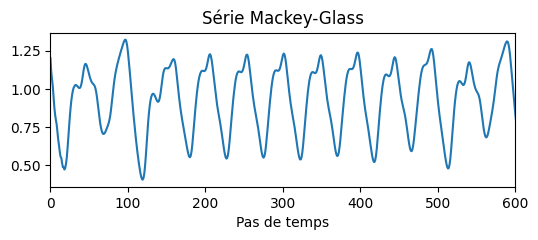

In [3]:
# Import de la série Mackey-Glass
from reservoirpy.datasets import mackey_glass

timeseries = mackey_glass(n_timesteps=2_000, tau=17, seed=260_418)

print(type(timeseries), timeseries.shape)

plt.figure(figsize=(6, 2))
plt.title("Série Mackey-Glass")
plt.plot(timeseries)
plt.xlim(0, 600)
plt.xlabel("Pas de temps")
plt.show()

(1580, 1) (400, 1) (1580, 1) (400, 1)


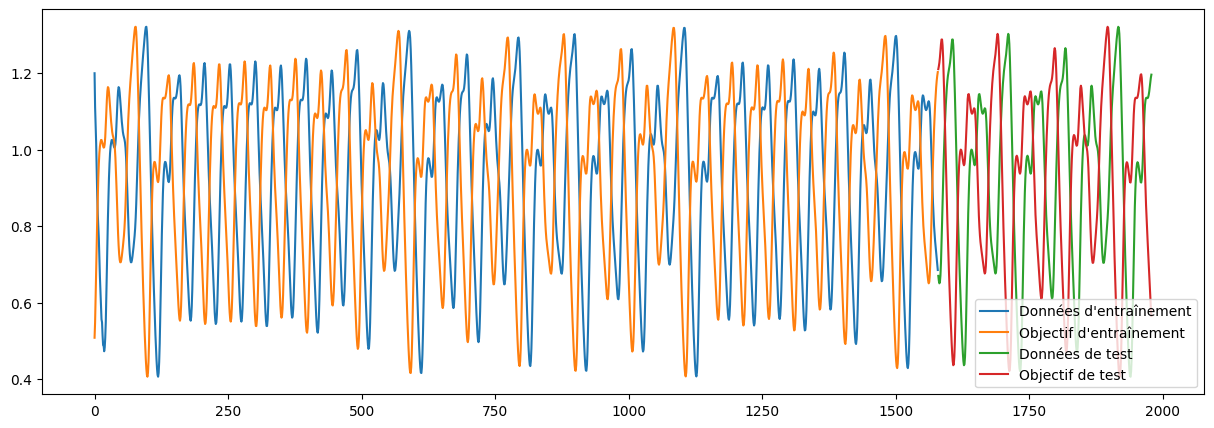

In [4]:
# Séparation X/Y et train/test
from reservoirpy.datasets import to_forecasting

X_train, X_test, Y_train, Y_test = to_forecasting(timeseries=timeseries, test_size=400, forecast=20)

print(
    X_train.shape,
    X_test.shape,
    Y_train.shape,
    Y_test.shape,
)
cutoff = X_train.shape[0]


plt.figure(figsize=(15, 5))
plt.plot(np.arange(0, 1580), X_train, label="Données d'entraînement")
plt.plot(np.arange(0, 1580), Y_train, label="Objectif d'entraînement")
plt.plot(np.arange(1580, 1980), X_test, label="Données de test")
plt.plot(np.arange(1580, 1980), Y_test, label="Objectif de test")
plt.legend()
plt.show()

In [5]:
# Créer le modèle
reservoir = Reservoir(
    units=500, # Nombre de neurones
    sr=1.25,   # Rayon spectral de la matrice de poids
    lr=0.3,    # Taux de décharge
    input_scaling=1. # Facteur multiplicatif de l'entrée
)
readout = Ridge(ridge=1e-4) # Régularisation: pénalise le sur-apprentissage
model = reservoir >> readout

In [6]:
# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, Y_train)

'Model-0': Model('Reservoir-0', 'Ridge-0')

In [7]:
# Évaluer le modèle sur les données de test
Y_pred = model.run(X_test)

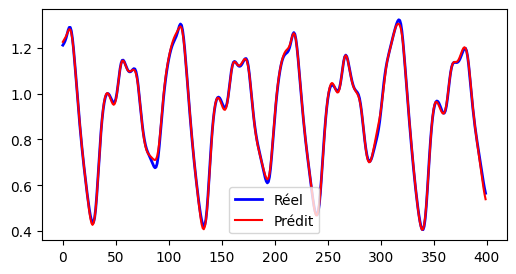

In [8]:
# Affichage des résultats
plt.figure(figsize=(6, 3))
plt.plot(Y_test, color="blue", linewidth=2, label="Réel")
plt.plot(Y_pred, color="red", label="Prédit")
plt.legend()
plt.show()

### Auscultons le réservoir

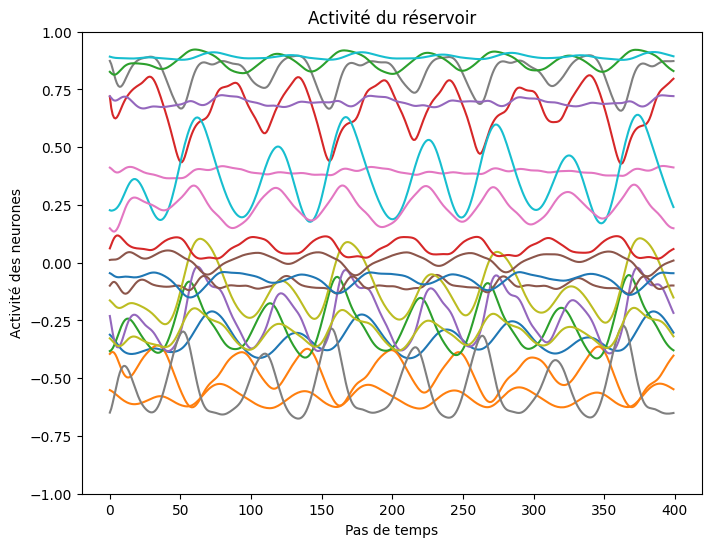

In [11]:
activity = reservoir.run(X_test)

plt.figure(figsize=(8, 6))
plt.plot(activity[:400, :20]) # 200 pas de temps, 20 neurones
plt.title("Activité du réservoir")
plt.xlabel("Pas de temps")
plt.ylabel("Activité des neurones")
plt.ylim([-1,1])
plt.show()

In [5]:
# Evaluez les performances
# TODO: calculez la MSE et NMRSE sur le jeux d'entrainement (train) et le jeu de test
# ...

## Prédiction univariée (Laser SantaFe A)
Nous allons essayer de prédire une autre série temporelle chaotique en gardant les mêmes valeurs d'hyperparamètres (input scaling, spectral radius, ...) et voir si ces hyperparamètres fonctionnent bien également pour cette autre série temporelle.

Pour info, cette série temporelle nous intéresse particulièrement car elle a été testé avec des réservoirs optiques dans un papier par Brunner et collègues de 2013 dans la revue Nature Communications.

In [4]:
# Redéinition de la seed au besoin
rpy.set_seed(2341)

<class 'numpy.ndarray'> (10093, 1)


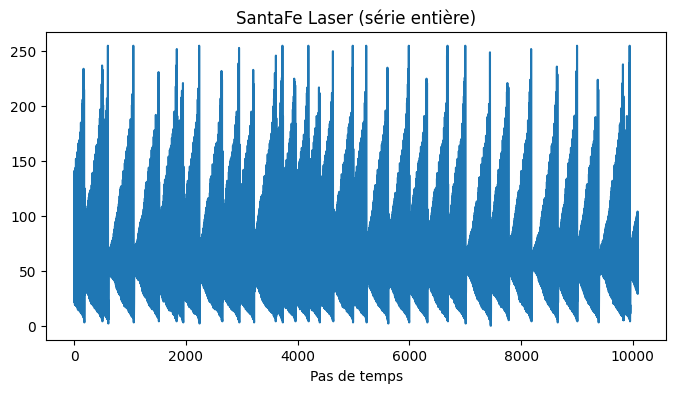

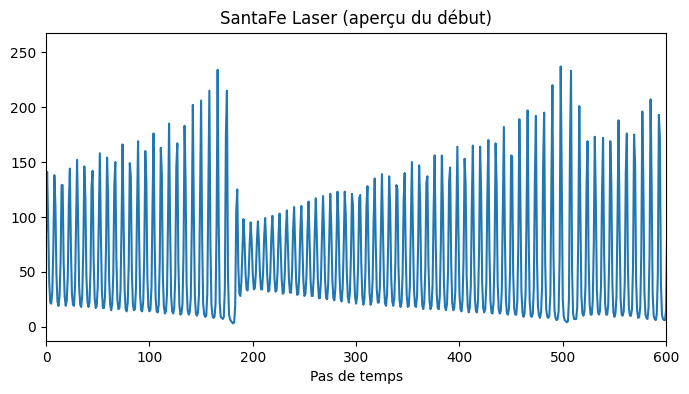

In [5]:
# Import de la série Laser
from reservoirpy.datasets import santafe_laser

timeseries = santafe_laser()

print(type(timeseries), timeseries.shape)

plt.figure(figsize=(8, 4))
plt.plot(timeseries) 
plt.title("SantaFe Laser (série entière)")
plt.xlabel("Pas de temps")
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(timeseries) 
plt.title("SantaFe Laser (aperçu du début)")
plt.xlabel("Pas de temps")
plt.xlim(0, 600)
plt.show()

In [6]:
# Nombres de pas de temps totaux
print("Taille de la série temporelle :", len(timeseries))

print(timeseries.shape)

# Comme dans l'article de Brunner 2013 (Nature Communications) on va séparer les données de train/test en 80%/20%
# On définit la taille du test
test_size = round(len(timeseries) * 20/100)
print("Taille de la portion gardée pour le test après entrainement :", test_size)

Taille de la série temporelle : 10093
(10093, 1)
Taille de la portion gardée pour le test après entrainement : 2019


(10093, 1)
(8073, 1) (2019, 1) (8073, 1) (2019, 1)
C'est important de noter que les vecteurs de train et test ont 2 dimensions et pas une seule même si la série n'a qu'une seule variable. Si les vecteurs n'ont pas deux dimensions cela peut créer des problèmes ensuite lors de l'entrainement.


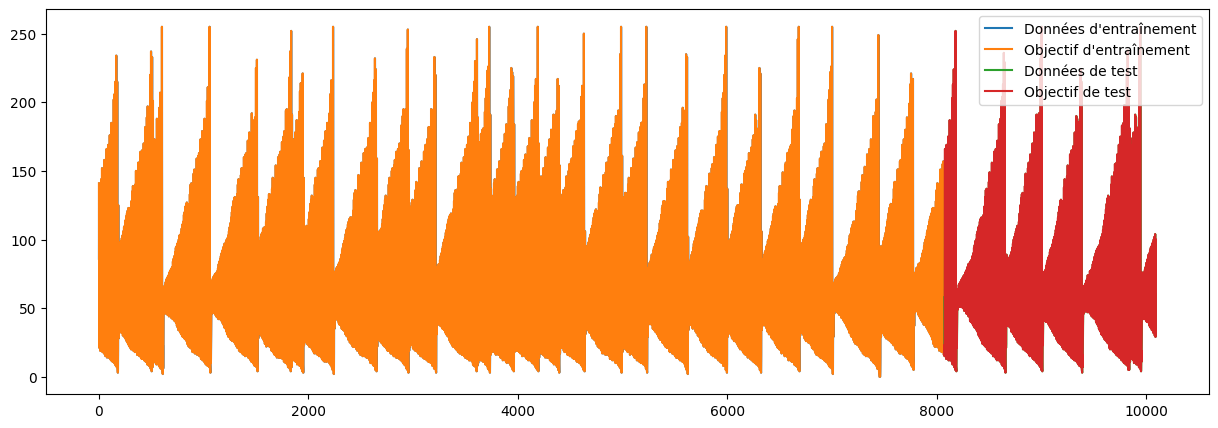

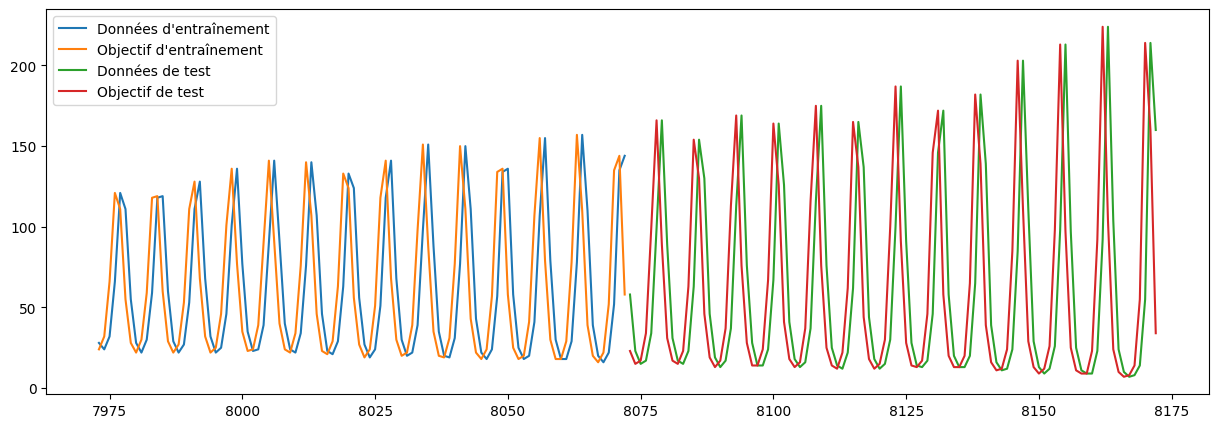

In [7]:
# Séparation X/Y et train/test
from reservoirpy.datasets import to_forecasting

# On fait de la prédiction à 1 pas de temps dans le futur : forecast = 1
## test_size = 400 # Pour faire des tests on peut aussi choisir d'arbitrairement réduire la taille de la série utilisée pour le test
X_train, X_test, Y_train, Y_test = to_forecasting(timeseries=timeseries, test_size=test_size, forecast=1)

print(timeseries.shape)

print(
    X_train.shape,
    X_test.shape,
    Y_train.shape,
    Y_test.shape,
)
cutoff = X_train.shape[0]

print("C'est important de noter que les vecteurs de train et test ont 2 dimensions et pas une seule même \
si la série n'a qu'une seule variable. Si les vecteurs n'ont pas deux dimensions cela peut créer des problèmes \
ensuite lors de l'entrainement.")

plt.figure(figsize=(15, 5))
plt.plot(np.arange(0, cutoff), X_train, label="Données d'entraînement")
plt.plot(np.arange(0, cutoff), Y_train, label="Objectif d'entraînement")
plt.plot(np.arange(cutoff, cutoff+test_size), X_test, label="Données de test")
plt.plot(np.arange(cutoff, cutoff+test_size), Y_test, label="Objectif de test")
plt.legend()
plt.show()

visu = 100
plt.figure(figsize=(15, 5))
plt.plot(np.arange(cutoff-visu, cutoff), X_train[cutoff-visu:cutoff,:], label="Données d'entraînement")
plt.plot(np.arange(cutoff-visu, cutoff), Y_train[cutoff-visu:cutoff,:], label="Objectif d'entraînement")
plt.plot(np.arange(cutoff, cutoff+visu), X_test[:visu,:], label="Données de test")
plt.plot(np.arange(cutoff, cutoff+visu), Y_test[:visu,:], label="Objectif de test")
plt.legend()
plt.show()

In [ ]:
# Création du modèle
#TODO

In [ ]:
# Entraînement du modèle
#TODO

In [ ]:
# Test du modèle
#TODO

In [ ]:
# Évaluation des performances du modèle
from reservoirpy.observables import nrmse
print(nrmse(y_true=Y_test, y_pred=Y_pred))

plt.figure()
plt.plot(Y_test, color="black", linewidth=3)
plt.plot(Y_pred, color="red")
plt.show()

In [ ]:
# Visualiser l'activité du réservoir
#TODO

In [3]:
# Est-ce que l'activité du réservoir vous semble similaire à l'activité pour la précédente tâche de prédiction ?
# OUI / NON

# Qu'est-ce que cette activité a de particulier ?
# ...

# Est-ce que cette activité semble propice pour effectuer des calculs (= est-ce qu'elle est assez "riche") ?
# OUI / NON

# Qu'est-ce que vous pouvez faire pour changer ça ?
# ... (au moins 2 solutions possibles)

# Effectuez un des changements choisis et observer de nouveau l'activité pour voir si vous obtenez une activité similaire à celle pour la tâche précédente
# ...

# Bravo pour cette résolution de problème ! Une fois ce changement fait vous pouvez passer à la suite :)

### Exploration des hyper-paramètres

Vous pouvez consulter le [tutoriel ReservoirPy sur la recherche d'hyper-paramètres](https://github.com/reservoirpy/reservoirpy/blob/master/tutorials/4-Understand_and_optimize_hyperparameters.ipynb) pour plus de détails :)

In [ ]:
# Définition de la fonction objectif
from reservoirpy.observables import nrmse, rsquare

def objective(dataset, config, *, input_scaling, N, sr, lr, ridge, seed):
    x_train, y_train, x_test, y_test = dataset
    seed = int(seed)
    
    # Construction du modèle à partir des hyper-paramètres explorés
    reservoir = Reservoir(
        units=N, 
        sr=sr, 
        lr=lr, 
        input_scaling=input_scaling, 
        seed=seed,
    )
    readout = Ridge(ridge=ridge)

    model = reservoir >> readout

    y_pred = model.fit(x_train, y_train) \
                        .run(x_test)

    return {'loss': nrmse(y_test, y_pred, norm_value=np.ptp(x_train)),
            'r2': rsquare(y_test, y_pred)}

In [ ]:
import json

hyperopt_config = {
    "exp": "recherche_1",    # nom de l'expérience
    "hp_max_evals": 200,     # nombre d'itérations
    "instances_per_trial": 5,# how many random ESN will be tried with each sets of parameters
    "hp_method": "random",   # méthode d'exploration
    "seed": 42,              # seed des paramètres sélectionnés
    "hp_space": {            # définition de l'espace exploré
        "N": ["choice", 500],             # réservoirs à 500 neurons
        "sr": ["loguniform", 1e-2, 10],   # rayon spectral exploré log-uniformément entre 0.01 et 10
        "lr": ["loguniform", 1e-3, 1],    # idem avec le taux de décharge, de 1e-3 à 1
        "input_scaling": ["loguniform", 1e-2, 10], # on fixe l'input scaling à 1
        "ridge": ["loguniform", 1e-8, 1e1], # régularisation, log-exploré entre 10^-8 à 1
        "seed": ["uniform", 1, 10000]       # seed d'initialisation du réservoir
    }
}

# we precautionously save the configuration in a JSON file
# each file will begin with a number corresponding to the current experimentation run number.
with open(f"{hyperopt_config['exp']}.config.json", "w+") as f:
    json.dump(hyperopt_config, f)


In [5]:
# Pendant l'exécution de cette cellule, prenez le temps de lire la cellule suivante ...

from reservoirpy.hyper import research

dataset = (X_train, Y_train, X_test, Y_test)
best = research(objective, dataset, f"{hyperopt_config['exp']}.config.json", ".")

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


NameError: name 'X_train' is not defined

In [4]:
# Vous trouvez que cela prend trop de temps ?
# -> Essayez de réduire le nombre de tests que vous faites pour exécuter le système plus rapidement
# Vous pouvez réduire l'un de ces deux paramètres ci-dessus :
# "hp_max_evals" ou "instances_per_trial"

# Que font ces deux paramètres ?
# ...

# Quel est l'effet de ces deux paramètres ?

# Est-ce que c'est intéressant/fiable de mettre "instances_per_trial" à 1 ?

In [ ]:
from reservoirpy.hyper import plot_hyperopt_report
fig = plot_hyperopt_report(hyperopt_config["exp"], ("lr", "sr", "ridge"), metric="r2")

In [12]:
# Ci-dessus vous n'affichez pas tous les hyper-paramètres que vous explorez.
# Quels sont les hyperparamètres que vous explorez (= que vous faites varier) ?
# ...

# Quels sont les hyperparamètres que vous n'explorez pas ?
# ...

# Recopiez les paramètres ci-dessus et ajouter le paramètre d'input scaling puis observez les résultats
# fig = plot_hyperopt_report(...)

In [ ]:
# 

In [ ]:
# Afin de faire une première recherche d'hyperparamètre (HP) plus rapidement,
# vous pouvez également changer le nombre de neurones dans le réservoir en changeant cette ligne:
# "N": ["choice", 500]

# Testez de mettre cette N à 100 et de comparer par rapport à vos résultats précédents
# Est-ce que les régions des hyperparamètres sont les meilleurs ont l'air d'être similaires ?
# OUI / OUI (sauf un hyperparamètre) / NON 

# Le ridge est un 

## Classification de séries temporelles: FordA

On prend ici un jeu de données de classification :

Le problème de classification consiste à diagnostiquer si un certain symptôme existe ou non dans un sous-système automobile. Chaque cas se compose de 500 mesures du bruit du moteur et d'une classification.
http://timeseriesclassification.com/description.php?Dataset=FordA

[Guide de la classification avec ReservoirPy](https://github.com/reservoirpy/reservoirpy/blob/master/tutorials/5-Classification-with-RC.ipynb)

In [ ]:
import pickle

with open("./data/FordA.pkl", 'rb') as file:
    fordA = pickle.load(file)

print(
    type(fordA),
    fordA[0].shape, # X_train
    fordA[1].shape, # Y_train
    fordA[2].shape, # X_test
    fordA[3].shape, # Y_test
)

### Pré-traitement

Pour ReservoirPy, toutes les données sont des séries temporelles. Ce qui n'est pas le cas ici pour les données à prédire en classification. Réglons ça.

In [ ]:
X_train = fordA[0]
Y_train = fordA[1]
X_test = fordA[2]
Y_test = fordA[3]

Y_train = np.repeat(Y_train.reshape(-1, 1, 1), 500, axis=1)
Y_test = np.repeat(Y_test.reshape(-1, 1, 1), 500, axis=1)

### Création d'un modèle et entraînement

In [ ]:
# Création du modèle
#TODO

In [ ]:
# Entraîner le modèle à classifier
#TODO

In [ ]:
# Lancer le modèle sur l'ensemble de test
#TODO

In [ ]:
# Décoder les prédictions
# Il faut avoir 1 sortie par série !
#TODO

In [ ]:
# Affichage des résultats
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

print(classification_report(y_true=Y_test, y_pred=Y_pred))

_ = ConfusionMatrixDisplay.from_predictions(y_true=Y_test, y_pred=Y_pred)

### Exploration des hyper-paramètres

In [ ]:
# Définition de la fonction objectif
#TODO

In [ ]:
# Configuration de la recherche
#TODO

In [ ]:
# Lancement de la recherche
#TODO

In [ ]:
# Affichage de l'exploration
#TODO